Lab1: X bar and R control chart for layer thickness measurements (in Angstroms) on 20 subgroups of four substrates.

In [5]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
# Loading the dataset
data = pd.read_excel('D:\VIT-AP\Second Semester\Statistical Control\Layer_Thickness_Data.xlsx')
data.head()

,Subgroup,x1,x2,x3,x4
0,1,459,449,435,450
1,2,443,440,442,442
2,3,457,444,449,444
3,4,469,463,453,438
4,5,443,457,445,454


In [59]:
# Cleanning the data
data.columns

Index(['Subgroup ', ' x1  ', 'x2 ', ' x3 ', ' x4 '], dtype='object')

We remark that our column name is containing white spaces

In [60]:
List = []
for i in data.columns:
    List.append(i.strip())
print(List)

['Subgroup', 'x1', 'x2', 'x3', 'x4']


In [61]:
# Update the columns name
data.columns = List
data.columns

Index(['Subgroup', 'x1', 'x2', 'x3', 'x4'], dtype='object')

In [62]:
# All the data input are in string, change into int
data = data.astype(int)

In [70]:
data.iloc[i, 1:5]

Subgroup      1
x1          459
x2          449
x3          435
x4          450
Name: 0, dtype: int32

In [71]:
# Calculate X bar, Range and concatanate to the dataset
data['x_bar'] = pd.DataFrame([data.iloc[i, 1:5].mean() for i in range(0, 20)])
data['range_r'] = pd.DataFrame([(data.iloc[i, 1:5].max()- data.iloc[i, 1:5].min()) for i in range(0, 20)])

In [72]:
data.head()

,Subgroup,x1,x2,x3,x4,x_bar,range_r
0,1,459,449,435,450,448.25,24.0
1,2,443,440,442,442,441.75,3.0
2,3,457,444,449,444,448.50,13.0
3,4,469,463,453,438,455.75,31.0
4,5,443,457,445,454,449.75,14.0


### R bar chart

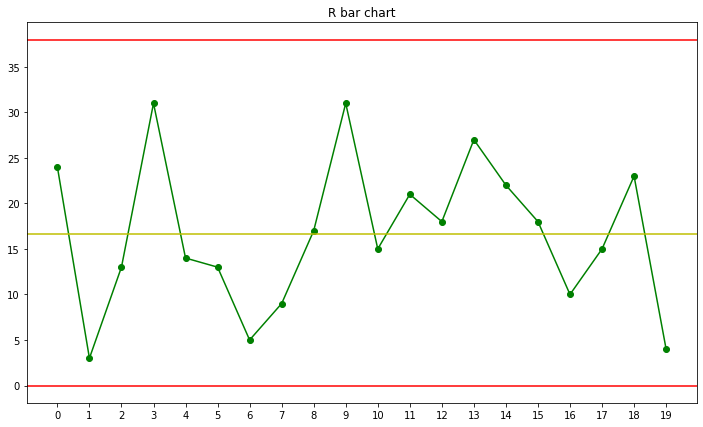

In [77]:
# Calculate the Central line, Upper control and lower Control limits
r_bar = data.range_r.mean()

d3 = 0 # Standard Factor for LCL for R-chart
d4 = 2.282 # Standard Factor for UCL for R-chart
# r-bar chart upper control limit and lower control limits
UCLr = d4 * r_bar
LCLr = d3 * r_bar

# Plotting the result
plt.figure(figsize=(12, 7))
plt.title('R bar chart')
plt.xticks(ticks=list(range(0,40)))
plt.plot(range(len(data.range_r)), data.range_r ,'go-')
plt.axhline(y=UCLr, color='r', linestyle='-')
plt.axhline(y=LCLr, color='r', linestyle='-')
plt.axhline(y=r_bar, color='y', linestyle='-')


Conclusion : The process is in control for the R bar chart

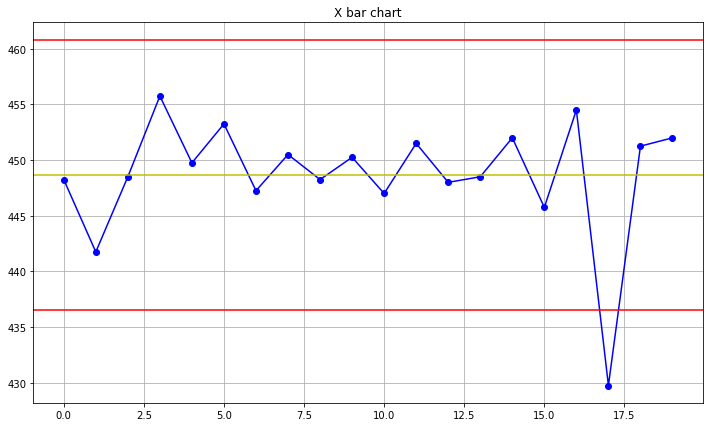

In [80]:
# x-bar chart upper control limit and lower control limits
x_bar_bar = data.x_bar.mean()
a2 = 0.729 # Standard Factor for LCL and UCL for X-chart

UCLx = x_bar_bar + a2 * r_bar
LCLx = x_bar_bar - a2 * r_bar

# Plotting the result
plt.figure(figsize=(12, 7))
plt.title('X bar chart')
plt.plot(range(len(data.x_bar)), data.x_bar ,'bo-' )
plt.axhline(y=UCLx, color='r', linestyle='-')
plt.axhline(y=LCLx, color='r', linestyle='-')
plt.axhline(y=x_bar_bar, color='y', linestyle='-')
plt.grid()

Conclusion : The process is out of control let's move to Phase two analysis

### Phase II Analysis for X bar chart

In [89]:
# Find the point that is out of control and drop it
out = data[data['x_bar'] < LCLx]
out
data.drop(index=17, inplace=True)

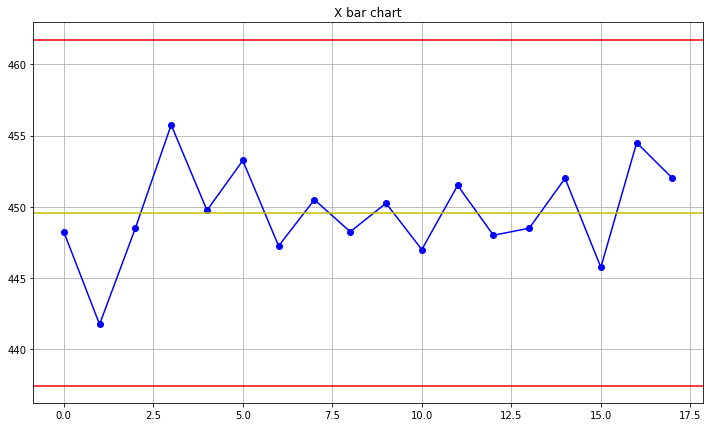

In [92]:
# New column of the xbar is 
data['x_bar'] = pd.DataFrame([data.iloc[i, 1:5].mean() for i in range(0, 19)])
# x-bar chart upper control limit and lower control limits
x_bar_bar = data.x_bar.mean()
a2 = 0.729 # Standard Factor for LCL and UCL for X-chart

UCLx = x_bar_bar + a2 * r_bar
LCLx = x_bar_bar - a2 * r_bar

# Plotting the result
plt.figure(figsize=(12, 7))
plt.title('X bar chart')
plt.plot(range(len(data.x_bar)), data.x_bar ,'bo-' )
plt.axhline(y=UCLx, color='r', linestyle='-')
plt.axhline(y=LCLx, color='r', linestyle='-')
plt.axhline(y=x_bar_bar, color='y', linestyle='-')
plt.grid()

Conclusion : The process is in control now

## Estimate the mean and the standard deviation of the process

In [239]:
import math
mean_estimated = x_bar_bar
row = data.index.size
calc_std = lambda col, mean: sum([(col[i] - mean)**2 for i in col.index]) 
std_estimated = lambda *a: math.sqrt(sum(a)/(len(a)*row))

sum_x1 = calc_std(data['x1'], mean_estimated)
sum_x2 = calc_std(data['x2'], mean_estimated)
sum_x3 = calc_std(data['x3'], mean_estimated)
sum_x4 = calc_std(data['x4'], mean_estimated)

std_estimated = std_estimated(sum_x1, sum_x2, sum_x3, sum_x4)
print('The Estimated mean is', mean_estimated)
print('The Estimated standard deviation is', std_estimated)

The Estimated mean is 449.59722222222223
The Estimated standard deviation is 8.05654044695112


#### Initial mean and standard deviation of the sample

In [238]:
# Concatanate all the data input into single array
sample = np.concatenate((data['x1'].values, data['x2'].values , data['x3'].values , data['x4'].values))
print('The Initial mean is', sample.mean())
print('The Initial standard deviation is', sample.std())


The Initial mean is 449.6842105263158
The Initial standard deviation is 8.056070816987042


#### Conclusion on the inital mean, standard deviation with the extimated mean and standard deviation

In [237]:
Percentage_Error_Mean = abs(((mean_estimated - sample.mean())/ sample.mean()))* 100

Percentage_Error_Std = abs(((std_estimated - sample.std())/ sample.std())) * 100

print("The percentage error for the mean is:", np.around(Percentage_Error_Mean, decimals = 3) ,'%')
print('The percentage error for the standard deviation is:', np.around(Percentage_Error_Std, decimals = 3),'%')

The percentage error for the mean is: 0.019 %
The percentage erro for the standard deviation is: 0.006 %


Conclusion : Accurate control chart